In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_theme()

train_path = "/kaggle/input/2025-sep-dl-gen-ai-project/train.csv"

df = pd.read_csv(train_path)
print("Shape:", df.shape)
df.head()


Shape: (6827, 8)


,id,text,anger,fear,joy,sadness,surprise,emotions
0,0,the dentist that did the work apparently did a...,1,0,0,1,0,['anger' 'sadness']
1,1,i'm gonna absolutely ~~suck~~ be terrible duri...,0,1,0,1,0,['fear' 'sadness']
2,2,"bridge: so leave me drowning calling houston, ...",0,1,0,1,0,['fear' 'sadness']
3,3,after that mess i went to see my now ex-girlfr...,1,1,0,1,0,['anger' 'fear' 'sadness']
4,4,"as he stumbled i ran off, afraid it might some...",0,1,0,0,0,['fear']


In [2]:
print("Columns:", df.columns.tolist())
print("\nData Types:\n")
print(df.dtypes)

print("\nNull values per column:\n")
print(df.isnull().sum())


Columns: ['id', 'text', 'anger', 'fear', 'joy', 'sadness', 'surprise', 'emotions']

Data Types:

id           int64
text        object
anger        int64
fear         int64
joy          int64
sadness      int64
surprise     int64
emotions    object
dtype: object

Null values per column:

id          0
text        0
anger       0
fear        0
joy         0
sadness     0
surprise    0
emotions    0
dtype: int64


In [3]:
# Emotion label columns
label_cols = ["anger", "fear", "joy", "sadness", "surprise"]

print("Label columns:", label_cols)

# Ensure they are int (0/1)
for col in label_cols:
    df[col] = df[col].astype(int)

print("\nTotal positives per label:")
print(df[label_cols].sum())

# Number of labels per sample
df["num_labels"] = df[label_cols].sum(axis=1)

print("\nDistribution of number of labels per sample:")
print(df["num_labels"].value_counts().sort_index())


Label columns: ['anger', 'fear', 'joy', 'sadness', 'surprise']

Total positives per label:
anger        808
fear        3860
joy         1660
sadness     2171
surprise    1999
dtype: int64

Distribution of number of labels per sample:
num_labels
0     676
1    2743
2    2587
3     706
4     112
5       3
Name: count, dtype: int64


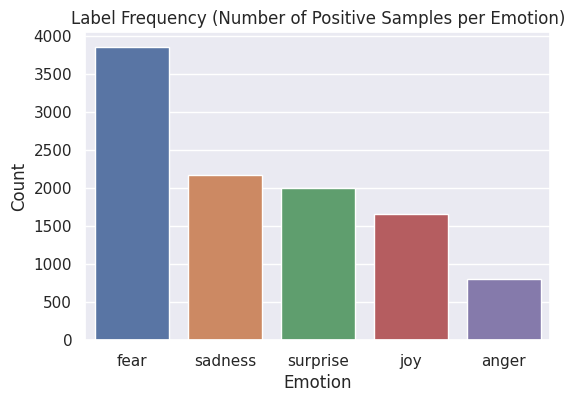

In [4]:
fig, ax = plt.subplots(figsize=(6, 4))
label_counts = df[label_cols].sum().sort_values(ascending=False)

sns.barplot(x=label_counts.index, y=label_counts.values, ax=ax)
ax.set_title("Label Frequency (Number of Positive Samples per Emotion)")
ax.set_ylabel("Count")
ax.set_xlabel("Emotion")
plt.show()


In [5]:
df["text_len_words"] = df["text"].fillna("").apply(lambda x: len(str(x).split()))
df["text_len_chars"] = df["text"].fillna("").apply(lambda x: len(str(x)))

print("Word length stats:\n", df["text_len_words"].describe())
print("\nChar length stats:\n", df["text_len_chars"].describe())


Word length stats:
 count    6827.000000
mean       15.684781
std        11.365744
min         1.000000
25%         8.000000
50%        13.000000
75%        20.000000
max        89.000000
Name: text_len_words, dtype: float64

Char length stats:
 count    6827.000000
mean       79.430790
std        57.397397
min         5.000000
25%        39.000000
50%        65.000000
75%       103.000000
max       450.000000
Name: text_len_chars, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


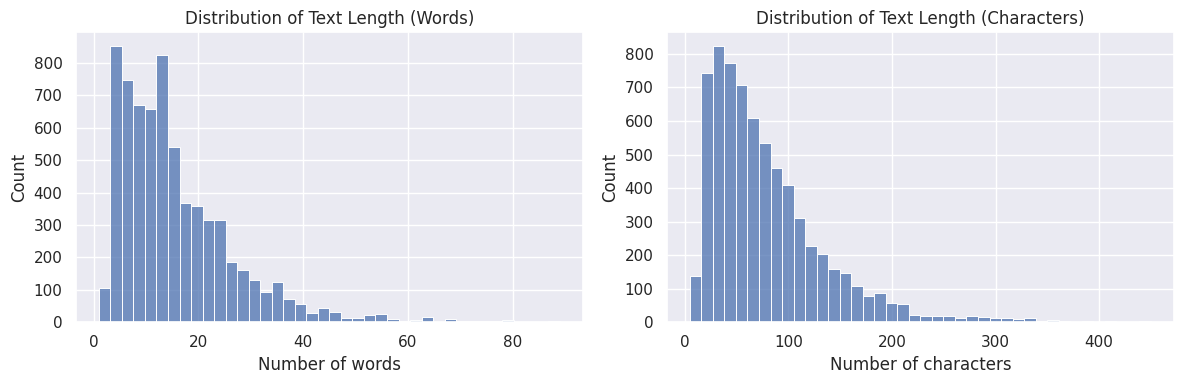

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df["text_len_words"], bins=40, kde=False, ax=axes[0])
axes[0].set_title("Distribution of Text Length (Words)")
axes[0].set_xlabel("Number of words")

sns.histplot(df["text_len_chars"], bins=40, kde=False, ax=axes[1])
axes[1].set_title("Distribution of Text Length (Characters)")
axes[1].set_xlabel("Number of characters")

plt.tight_layout()
plt.show()


In [11]:
# Show some examples with multiple label
multi_label_samples = df[df["num_labels"] > 1].head(10)

print("Examples with multiple emotions\n\n")
for i, row in multi_label_samples.iterrows():
    labels_present = [lab for lab in label_cols if row[lab] == 1]
    print(f"Text: {row['text']}")
    print(f"Labels: {labels_present}")
    print("-" * 80)


Examples with multiple emotions


Text: the dentist that did the work apparently did a lousy job as in just a few years my teeth decayed under the crowns so i had no choice but to get partials.
Labels: ['anger', 'sadness']
--------------------------------------------------------------------------------
Text: i'm gonna absolutely ~~suck~~ be terrible during my first sexual experience ._.
Labels: ['fear', 'sadness']
--------------------------------------------------------------------------------
Text: bridge: so leave me drowning calling houston, and let my lungs cave in, from calling god, for my mistakes and to the one who deserves the apology.
Labels: ['fear', 'sadness']
--------------------------------------------------------------------------------
Text: after that mess i went to see my now ex-girlfriend at school because she refused to drive home to see me.
Labels: ['anger', 'fear', 'sadness']
--------------------------------------------------------------------------------
Text: i n

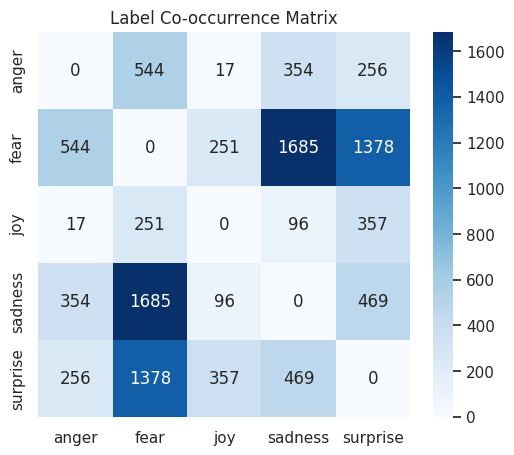

In [8]:
co_matrix = np.zeros((len(label_cols), len(label_cols)), dtype=int)

for _, row in df[label_cols].iterrows():
    active = np.where(row.values == 1)[0]
    for i in active:
        for j in active:
            if i != j:
                co_matrix[i, j] += 1

co_df = pd.DataFrame(co_matrix, index=label_cols, columns=label_cols)

plt.figure(figsize=(6, 5))
sns.heatmap(co_df, annot=True, fmt="d", cmap="Blues")
plt.title("Label Co-occurrence Matrix")
plt.show()
